In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],  # Fallback to Arial if Helvetica not found
    'mathtext.fontset': 'custom',  # For consistent math rendering
    'mathtext.rm': 'Helvetica',
    'mathtext.it': 'Helvetica:italic',
    'mathtext.bf': 'Helvetica:bold',
    'font.size': 10,  # Standard size for journal publications
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

In [3]:
import os

# current directory
dir_nb = notebook_dir = os.getcwd()
# directory containing python scripts
dir_py = os.path.abspath(os.path.join(dir_nb, "..", "python"))
# directory to save plots
dir_pl = os.path.abspath(os.path.join(dir_nb, "..", "plots"))

os.chdir(dir_py)

In [4]:
from utils_pL import *
from utils_kint import calculate_kint

In [5]:
seq = 'AAAAA'
temp = 293
deut = np.linspace(0,1,101)
pH_read = 7

df = pd.DataFrame(columns=['x', 'kforw', 'kback'])

for _,x in enumerate(deut):
    ki = calculate_kint(seq=seq, T=temp, x=x, pH_read=pH_read, ref='PDLA')
    df.loc[_] = [x] + ki.loc[3, ['kforw', 'kback']].values.tolist()

In [6]:
df['kint'] = df['kforw'] + df['kback']
df['Kback'] = df['kback'] / df['kforw']
df['Deq'] = 1 / (1 + df['Kback'])
df['ff'] = (df['Deq'] / (1 - df['Deq'])) * (1 - df['x']) / df['x']

df

,x,kforw,kback,kint,Kback,Deq,ff
0,0.00,0.000000,11.182077,11.182077,inf,0.000000,NaN
1,0.01,0.133464,10.990072,11.123536,82.344613,0.011998,1.202264
2,0.02,0.264995,10.800251,11.065246,40.756425,0.023948,1.202264
3,0.03,0.394613,10.612589,11.007202,26.893695,0.035850,1.202264
4,0.04,0.522337,10.427062,10.949399,19.962331,0.047705,1.202264
...,...,...,...,...,...,...,...
96,0.96,6.148520,0.213088,6.361608,0.034657,0.966504,1.202264
97,0.97,6.161729,0.158508,6.320237,0.025725,0.974921,1.202264
98,0.98,6.174342,0.104808,6.279150,0.016975,0.983309,1.202264
99,0.99,6.186379,0.051976,6.238355,0.008402,0.991668,1.202264


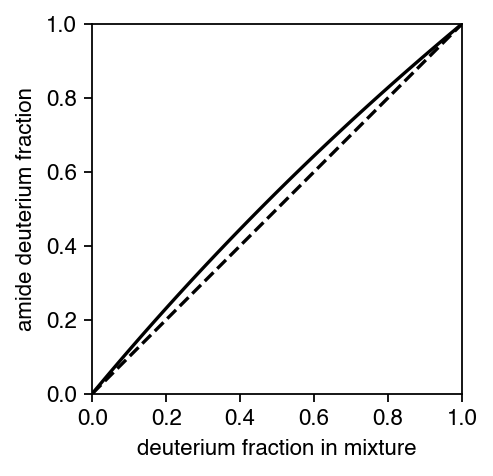

In [8]:
plt.figure(figsize=(3,3), dpi=160)
plt.plot(df['x'], df['x'], linestyle='dashed', c='k')
plt.plot(df['x'], df['Deq'], c='k')
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('deuterium fraction in mixture')
plt.ylabel('amide deuterium fraction')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()